# Setup

In [1]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

### 1) Apply histogram equalization on a histogram equalized image. In other words, apply histogram equalization twice on an image. Is there any difference between the first and second output image? You are free to use any image.

(<AxesSubplot:>, [<matplotlib.lines.Line2D at 0x214a5ab55b0>], (0.0, 255.0))

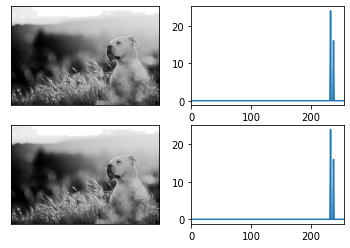

In [2]:
img = cv.imread('dog1.jfif', 0)   # grayscale 

eq = cv.equalizeHist(img)
eq2 = cv.equalizeHist(eq)

hist_eq = cv.calcHist(eq, [0], None, [256], [0, 255])
hist_eq2 = cv.calcHist(eq2, [0], None, [256], [0, 255])

plt.figure()
plt.subplot(221), plt.imshow(eq, cmap = 'gray'),
plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.plot(hist_eq), plt.xlim([0, 255])
plt.subplot(223), plt.imshow(eq2, cmap = 'gray'),
plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.plot(hist_eq2), plt.xlim([0, 255])

# There is no different of first and seconf output image

### 2) Load the image 'electronic.jfif'. Then,
- Experiment with different kernel size. Which kernel size is the most appropriate?
- Perform edge detection using Sobel operator (combined both x and y) with and without image smoothing (Gaussian blurring). Display the 2 images.
- Try Laplacian of Gaussian

In [3]:
img = cv.imread('electronic.jfif')
img_blur = cv.GaussianBlur(img, (5,5), 0)

# Sobel operator (combined both x and y) with image smoothing (Gaussian blurring)
sobelx_blur = cv.Sobel(img_blur, cv.CV_64F, 1, 0, ksize = 3)
sobely_blur = cv.Sobel(img_blur, cv.CV_64F, 0, 1,ksize = 3)

abs_sobelx_u8_blur = cv.convertScaleAbs(sobelx_blur)
abs_sobely_u8_blur = cv.convertScaleAbs(sobely_blur)

mag_edge_blur = cv.addWeighted(abs_sobelx_u8_blur, 0.5, abs_sobely_u8_blur, 0.5, 0)

# Sobel operator (combined both x and y) without image smoothing (Gaussian blurring)
sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize = 3)
sobely = cv.Sobel(img, cv.CV_64F, 0, 1,ksize = 3)

abs_sobelx_u8 = cv.convertScaleAbs(sobelx)
abs_sobely_u8 = cv.convertScaleAbs(sobely)

mag_edge = cv.addWeighted(abs_sobelx_u8, 0.5, abs_sobely_u8, 0.5, 0)

# Laplacian of Gaussian
laplacian = cv.Laplacian(img_blur, cv.CV_64F, ksize = 3)
laplacian_8u = np.uint8(np.absolute(laplacian))

cv.imshow('Sobeel without gaussian filter', np.hstack((img, mag_edge)))
cv.imshow('Sobeel with gaussian filter', np.hstack((img, mag_edge_blur)))
cv.imshow('Laplacian', np.hstack((img, laplacian_8u)))

cv.waitKey(0)
cv.destroyAllWindows()

# A) The kernel size is the most appropriate is 3

### 3) Experiment with different edge detectors: Sobel, Laplacian, Prewitt, Scharr derivatives and Canny operators (all with aperture size of 3) on image named 'pineapple.jfif'. Comment on the results.

In [4]:
img = cv.imread('pineapple.jfif')
img = cv.medianBlur(img, 3)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Sobel
sobelx = cv.Sobel(img_gray, cv.CV_64F, 1, 0, ksize = 3)
sobely = cv.Sobel(img_gray, cv.CV_64F, 0, 1,ksize = 3)
abs_sobelx_u8 = cv.convertScaleAbs(sobelx)
abs_sobely_u8 = cv.convertScaleAbs(sobely)
sobel = cv.addWeighted(abs_sobelx_u8, 0.5, abs_sobely_u8, 0.5, 0)

# Laplacian
laplacian = cv.Laplacian(img_gray, cv.CV_64F, ksize = 3)
laplacian_8u = np.uint8(np.absolute(laplacian))

# Prewitt
kernelx = np.array([[3,3,3],[0,0,0],[-3,-3,-3]])
kernely = np.array([[-3,0,3],[-3,0,3],[-3,0,3]])
img_prewittx = cv.filter2D(img_gray, -1, kernelx)
img_prewitty = cv.filter2D(img_gray, -1, kernely)
prewitt = cv.add(img_prewittx, img_prewitty)

# Scharr derivatives
scharr_X = cv.Scharr(img_gray, cv.CV_64F, 1, 0) 
scharr_X_abs = np.uint8(np.absolute(scharr_X))
scharr_Y = cv.Scharr(img_gray, cv.CV_64F, 0, 1) 
scharr_Y_abs = np.uint8(np.absolute(scharr_Y)) 
scharr_XY_combined = cv.bitwise_or(scharr_Y_abs,scharr_X_abs)

# Canny
canny = cv.Canny(img_gray, 100, 200, apertureSize = 3)

cv.imshow('Sobel', sobel)
cv.imshow('Laplacian', laplacian_8u)
cv.imshow('Prewitt', prewitt)
cv.imshow('Scharr derivatives', scharr_XY_combined)
cv.imshow('Canny', canny)

cv.waitKey(0)
cv.destroyAllWindows()

# Sobel: edges generated have medium thickness, accurate but a bit blurry
# Laplacian: edges generated are thin, accurate but too blurry
# Prewitt: The edges generated have medium thickness, clearer than sobel, but it is not accurate
# Scharr derivatives: The edges are sharp, clear but too specific
# Canny: The edges generated are thin, sharp ,clear and accurate

### 4) Write a program to identify the white object (probably laptop) present in the image 'electronic.jfif'. Draw bounding boxes on the objects.

In [5]:
img = cv.imread('electronic.jfif')

mask = cv.inRange(img, (160,160,160), (255,255,255))

contours, hierarchy = cv.findContours(mask, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

cnt_list = np.zeros(len(contours))

for i in range(0,len(contours)):
    cnt_list[i] = cv.contourArea(contours[i])
    
largest_contour_index = np.argmax(cnt_list)
largest_contour = contours[largest_contour_index]
contour_mask = np.zeros(img.shape, dtype = np.uint8)

if len(contours) != 0:
    cv.drawContours(contour_mask, contours, largest_contour_index, (255,255,255), -1)

boundingbox_img = img.copy()
x,y,w,h = cv.boundingRect(largest_contour)
cv.rectangle(boundingbox_img,(x,y),(x+w,y+h),(0,255,0),2)

cv.imshow("wihte object", boundingbox_img)
cv.waitKey(0)
cv.destroyAllWindows()